<a href="https://colab.research.google.com/github/ylmgrbzz/Deep-Learning-Projects-With-Keras-TensorFlow-PyTorch/blob/main/Comparison_of_Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pip install -q keras


In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow  as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


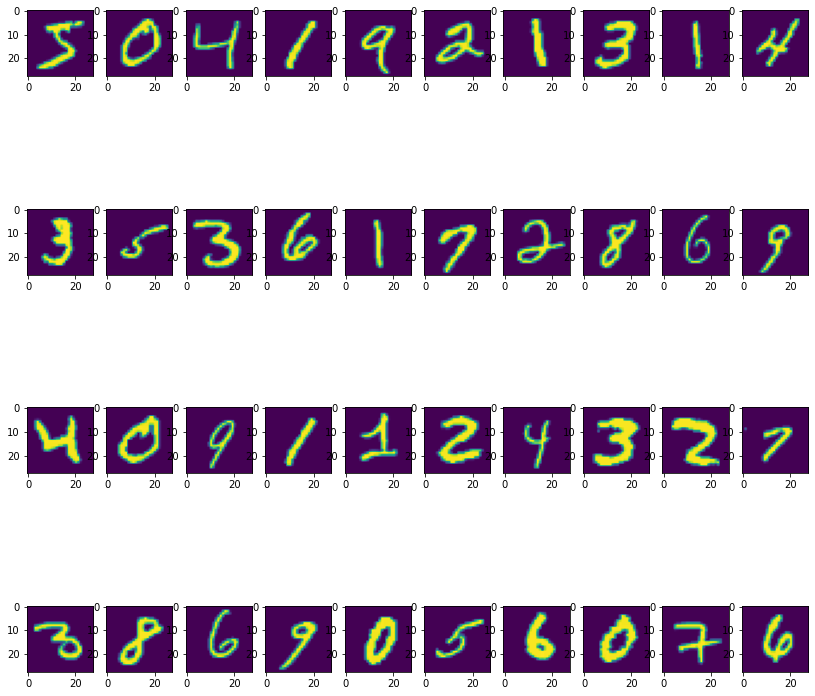

In [7]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

In [8]:
batch_size = 128 
num_classes = 10 
epochs = 20 
w_l2 = 1e-5 

In [9]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)


In [10]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 24, 24, 64)       

In [15]:
hist_sigmoid=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 15s 12ms/step - loss: 0.5418 - accuracy: 0.8638 - val_loss: 0.7140 - val_accuracy: 0.7536 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1931 - accuracy: 0.9505 - val_loss: 0.0930 - val_accuracy: 0.9736 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1353 - accuracy: 0.9630 - val_loss: 0.0669 - val_accuracy: 0.9795 - lr: 0.0010
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1081 - accuracy: 0.9692 - val_loss: 0.0738 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0903 - accuracy: 0.9736 - val_loss: 0.0454 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0799 - accuracy: 0.9765 - val_loss: 0.0403 - val_accuracy: 0.9865 - lr: 0.0010
Epoch 7/20
469/469 [==============================] - 7s 15ms/s

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 24, 24, 64)       

In [17]:
hist_tanh=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1847 - accuracy: 0.9447 - val_loss: 0.0714 - val_accuracy: 0.9769 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0788 - accuracy: 0.9763 - val_loss: 0.0535 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0612 - accuracy: 0.9816 - val_loss: 0.0443 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0414 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0454 - accuracy: 0.9859 - val_loss: 0.0418 - val_accuracy: 0.9863 - lr: 0.0010
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.0509 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 7/20
469/469 [==============================] - 6s 12ms/st

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_8 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 24, 24, 64)       

In [19]:
hist_relu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.1729 - accuracy: 0.9524 - val_loss: 0.2427 - val_accuracy: 0.9293 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0700 - accuracy: 0.9796 - val_loss: 0.0415 - val_accuracy: 0.9863 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0576 - accuracy: 0.9831 - val_loss: 0.0325 - val_accuracy: 0.9885 - lr: 0.0010
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0451 - accuracy: 0.9863 - val_loss: 0.0388 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0299 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0273 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 7/20
469/469 [==============================] - 5s 10ms/st

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dense(64, activation='linear'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Dense(64, activation='linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dense(64, activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 26, 26, 64)        2112      
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_11 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 24, 24, 64)       

In [22]:
hist_LeakyReLU=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 9s 17ms/step - loss: 0.2765 - accuracy: 0.9204 - val_loss: 0.4111 - val_accuracy: 0.8699 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1345 - accuracy: 0.9599 - val_loss: 0.0857 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 0.1113 - accuracy: 0.9669 - val_loss: 0.0770 - val_accuracy: 0.9756 - lr: 0.0010
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1022 - accuracy: 0.9691 - val_loss: 0.0713 - val_accuracy: 0.9778 - lr: 0.0010
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0909 - accuracy: 0.9730 - val_loss: 0.0678 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0870 - accuracy: 0.9732 - val_loss: 0.0740 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 7/20
469/469 [==============================] - 7s 15ms/st

In [23]:
def swish(x):
    return x * K.sigmoid(x)

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), 
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_13 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_14 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 24, 24, 64)       

In [25]:
hist_swish=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.1519 - accuracy: 0.9579 - val_loss: 0.3371 - val_accuracy: 0.9127 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0614 - accuracy: 0.9821 - val_loss: 0.0413 - val_accuracy: 0.9866 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0362 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.0278 - val_accuracy: 0.9904 - lr: 0.0010
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0255 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0269 - val_accuracy: 0.9915 - lr: 0.0010
Epoch 7/20
469/469 [==============================] - 6s 12ms/st

In [26]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acc': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_acc': 'valid. accuracy', 'acc': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['Sigmoid', 'tanh', 'ReLU', 'Leaky_ReLU', 'Swish'], loc=loc)  

    plt.show()

In [27]:
hists = [hist_sigmoid, hist_tanh, hist_relu, hist_LeakyReLU, hist_swish]


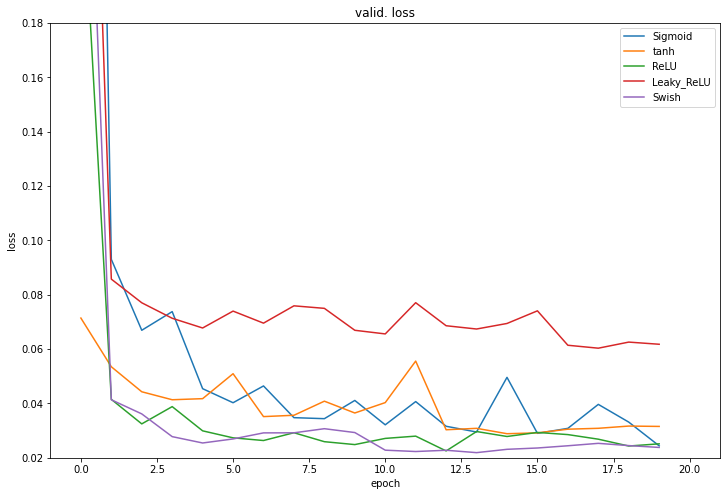

In [32]:
plot_history(hists, attribute='val_loss', axis=(-1,21,0.02,0.18), loc='upper right')


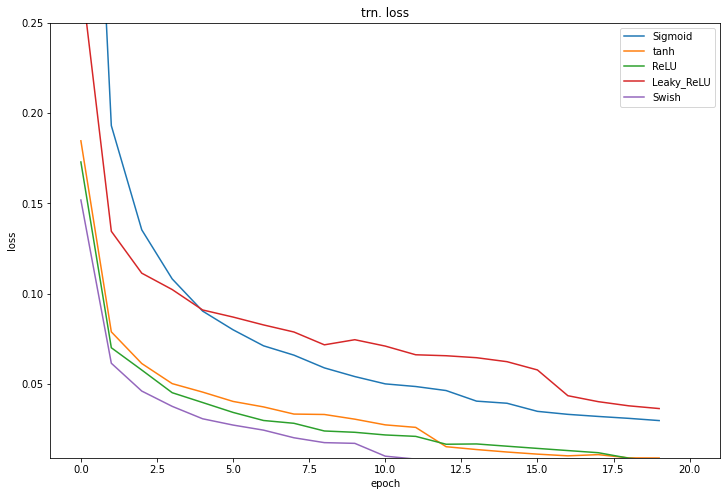

In [33]:
plot_history(hists, attribute='loss', axis=(-1,21,0.009,0.25), loc='upper right')
